<div style="padding:20px;color:white;margin:0;font-size:300%;text-align:center;display:fill;border-radius:60px;background-color:#0000FF;overflow:hidden;font-weight:800">Credit Risk Analysis</div>

### 1 - About Dataset

**Description:**

This dataset provides essential information about loan applicants and their characteristics.

In today's financial landscape, assessing credit risk is crucial for lenders and financial institutions. This dataset offers a simplified view of the factors that contribute to credit risk, making it an excellent opportunity for data scientists to apply their skills in machine learning and predictive modeling.

**Column Descriptions:**

ID: Unique identifier for each loan applicant.

Age: Age of the loan applicant.

Income: Income of the loan applicant.

Home: Home ownership status (Own, Mortgage, Rent).

Emp_Length: Employment length in years.

Intent: Purpose of the loan (e.g., education, home improvement).

Amount: Loan amount applied for.

Rate: Interest rate on the loan.

Status: Loan approval status (Fully Paid, Charged Off, Current).

Percent_Income: Loan amount as a percentage of income.

Default: Whether the applicant has defaulted on a loan previously (Yes, No).

Cred_Length: Length of the applicant's credit history.

Explore this dataset, preprocess the data as needed, and develop machine learning models, especially using Random Forest, to predict loan default. Your insights and solutions could contribute to better credit risk assessment methods and potentially help lenders make more informed decisions.

Remember to respect data privacy and ethics guidelines while working with this data. Good luck, and happy analyzing!

### 2 - Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import plotly.graph_objects as go


import plotly.express as ex
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ROCAUC
from yellowbrick.style import set_palette
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

### 3 - Importing Dataset

In [5]:
df = pd.read_csv("credit_risk.csv")

### 4 - Inspecting Dataframe Structure

In [6]:
# Check first 5 lines
df.head()

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4


In [7]:
# Check last 5 lines
df.tail()

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
32576,32576,57,53000,MORTGAGE,1.0,PERSONAL,5800,13.16,0,0.11,N,30
32577,32577,54,120000,MORTGAGE,4.0,PERSONAL,17625,7.49,0,0.15,N,19
32578,32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,35000,10.99,1,0.46,N,28
32579,32579,56,150000,MORTGAGE,5.0,PERSONAL,15000,11.48,0,0.10,N,26
32580,32780,66,42000,RENT,2.0,MEDICAL,6475,9.99,0,0.15,N,30


In [8]:
# Check Dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              32581 non-null  int64  
 1   Age             32581 non-null  int64  
 2   Income          32581 non-null  int64  
 3   Home            32581 non-null  object 
 4   Emp_length      31686 non-null  float64
 5   Intent          32581 non-null  object 
 6   Amount          32581 non-null  int64  
 7   Rate            29465 non-null  float64
 8   Status          32581 non-null  int64  
 9   Percent_income  32581 non-null  float64
 10  Default         32581 non-null  object 
 11  Cred_length     32581 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 3.0+ MB


In [9]:
# Null Data
df.isna().sum()

Id                   0
Age                  0
Income               0
Home                 0
Emp_length         895
Intent               0
Amount               0
Rate              3116
Status               0
Percent_income       0
Default              0
Cred_length          0
dtype: int64

<div class="alert alert-block alert-info" style="background-color:#d5f4da;color:#0000FF;border-color:black;width:80%;margin: auto;text-align: center;"><b>Comment:</b> Let's replace the null numbers with the 'mean' of each feature.</div>

In [10]:
# Changing NaN data to "more frequent" using strategy 'mean'.
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
df['Emp_length'] = imputer.fit_transform(df[['Emp_length']])
df['Rate'] = imputer.fit_transform(df[['Rate']]) 

In [11]:
# Null Data
df.isna().sum()

Id                0
Age               0
Income            0
Home              0
Emp_length        0
Intent            0
Amount            0
Rate              0
Status            0
Percent_income    0
Default           0
Cred_length       0
dtype: int64

In [12]:
# Drop 'Id' column

df.drop(["Id"], axis=1, inplace=True)


In [13]:
# Check duplicate data
print("Number of duplicates: " + str(df.duplicated().sum()))

Number of duplicates: 165


<div class="alert alert-block alert-info" style="background-color:#d5f4da;color:#0000FF;border-color:black;width:80%;margin: auto;text-align: center;"><b>Comment:</b> There are 165 duplicates data in the dataset. Let's delete them.</div>

In [14]:
# Dropping ALL duplicate values
df.drop_duplicates(keep=False,inplace=True) 

In [15]:
# Check row and column numbers
df.shape 

(32251, 11)

In [16]:
# Number of unique values per column.
df.nunique() 

Age                 58
Income            4279
Home                 4
Emp_length          37
Intent               6
Amount             753
Rate               349
Status               2
Percent_income      76
Default              2
Cred_length         29
dtype: int64

In [17]:
# Check the unique values and frequency for 'Status'
df['Status'].value_counts() 

Status
0    25181
1     7070
Name: count, dtype: int64

### 5 - Exploratory Data Analysis (EDA)

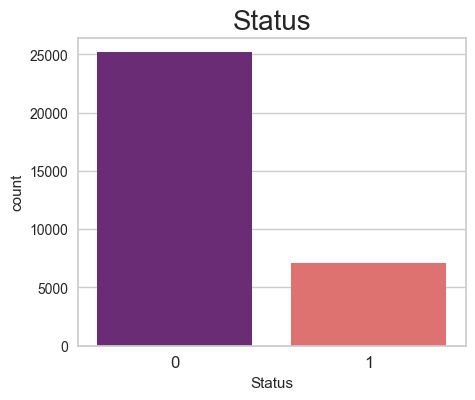

In [18]:
# Status - Target Feature

fig, ax = plt.subplots(figsize=(5, 4))
sns.countplot(x=df["Status"], palette="magma")
plt.title('Status', fontsize = 20)
plt.xticks(fontsize = 12)
plt.show() 

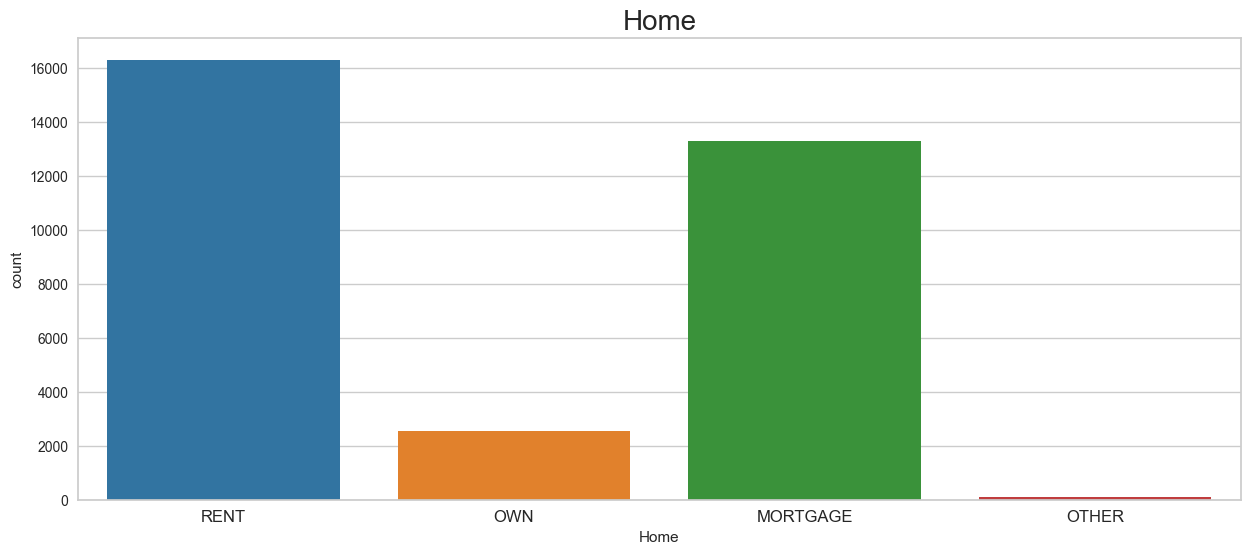

In [19]:
# Home

fig, ax = plt.subplots(figsize=(15, 6))
sns.countplot(x=df["Home"], palette="tab10")
plt.title('Home', fontsize = 20)
plt.xticks(fontsize = 12)
plt.show()

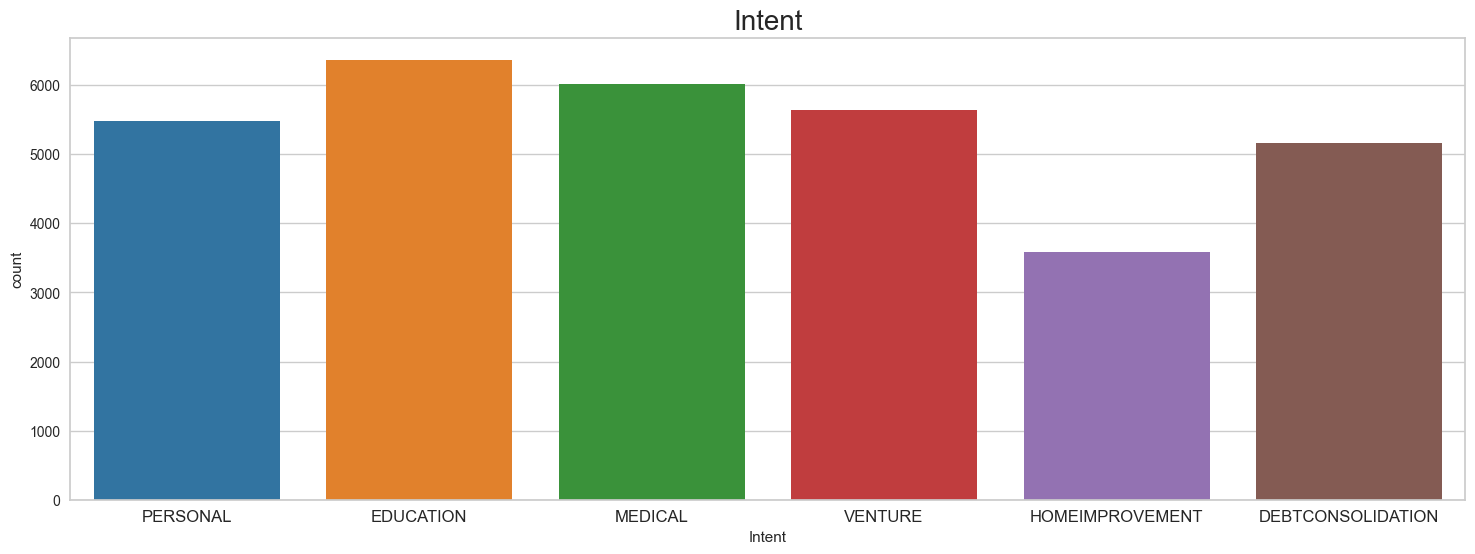

In [20]:
# Intent

fig, ax = plt.subplots(figsize=(18, 6))
sns.countplot(x=df["Intent"], palette="tab10")
plt.title('Intent', fontsize = 20)
plt.xticks(fontsize = 12)
plt.show() 

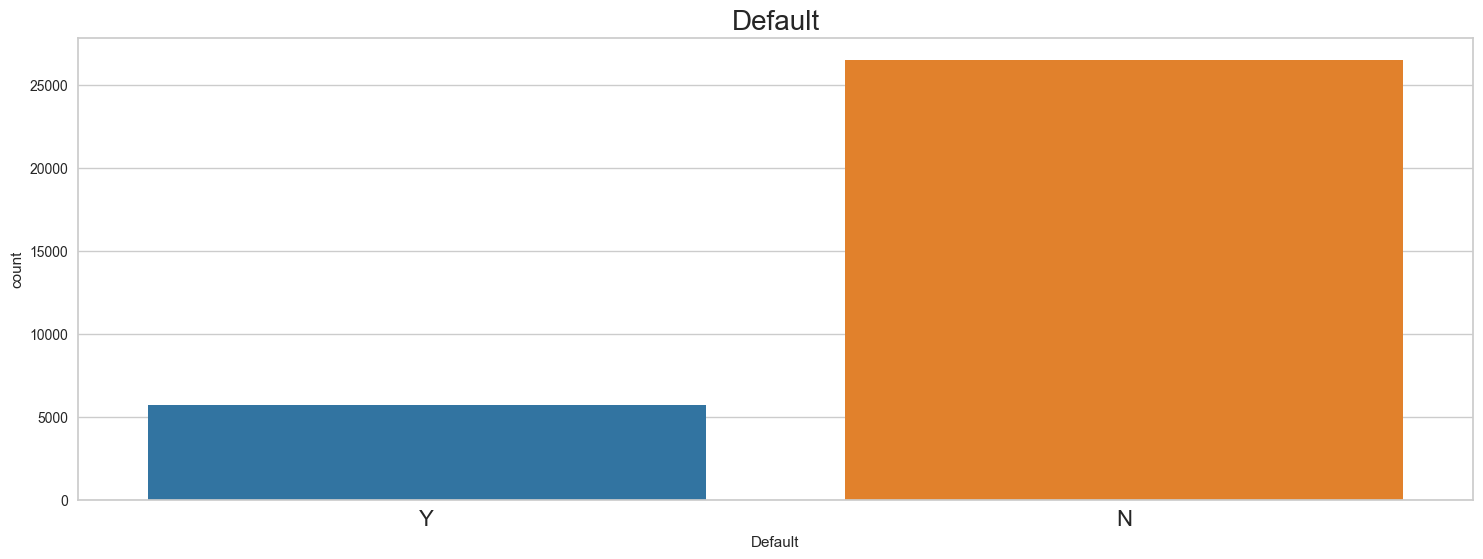

In [21]:
# Default

fig, ax = plt.subplots(figsize=(18, 6))
sns.countplot(x=df["Default"], palette="tab10")
plt.title('Default', fontsize = 20)
plt.xticks(fontsize = 16)
plt.show() 

<div class="alert alert-block alert-info" style="background-color:#d5f4da;color:#0000FF;border-color:black;width:80%;margin: auto;text-align: center;"><b>Comment:</b> Now let's change object columns to numeric using labelencoder. We will do this to prepare the dataframe for applying the algorithms.</div>

In [22]:
# Converting object columns to numeric - "LabelEncoder"

from sklearn.preprocessing import LabelEncoder

# instanciar encoder
lb = LabelEncoder()

objList = df.select_dtypes(include = "object").columns

for obj in objList:
    df[obj] = lb.fit_transform(df[obj].astype(str)) 

In [23]:
df.head()

,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,22,59000,3,123.0,4,35000,16.02,1,0.59,1,3
1,21,9600,2,5.0,1,1000,11.14,0,0.10,0,2
2,25,9600,0,1.0,3,5500,12.87,1,0.57,0,3
3,23,65500,3,4.0,3,35000,15.23,1,0.53,0,2
4,24,54400,3,8.0,3,35000,14.27,1,0.55,1,4


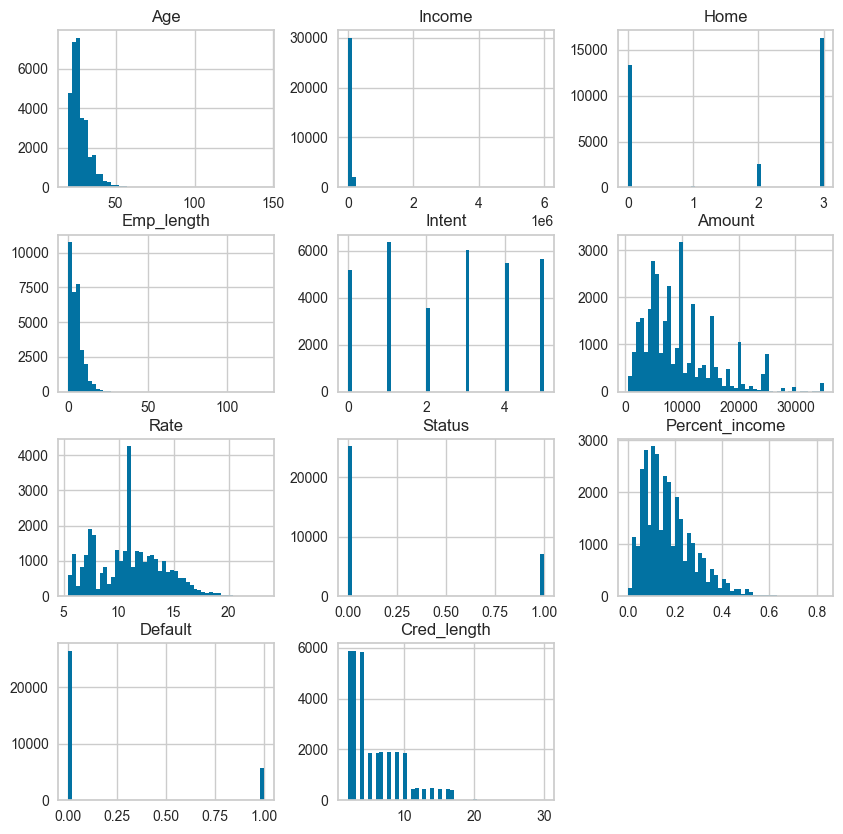

In [24]:
# Histogram Dataset

df.hist(bins=50, figsize=(10,10))
plt.show() 

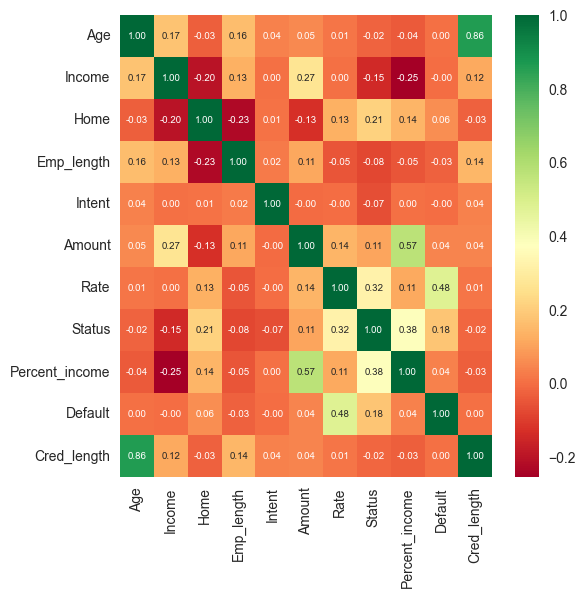

In [25]:
# Heatmap

df_corr = df.corr()
f, ax = plt.subplots(figsize=(6, 6))

sns.heatmap(df_corr, annot=True, fmt='.2f', cmap='RdYlGn',annot_kws={'size': 7}, ax=ax)
plt.show() 

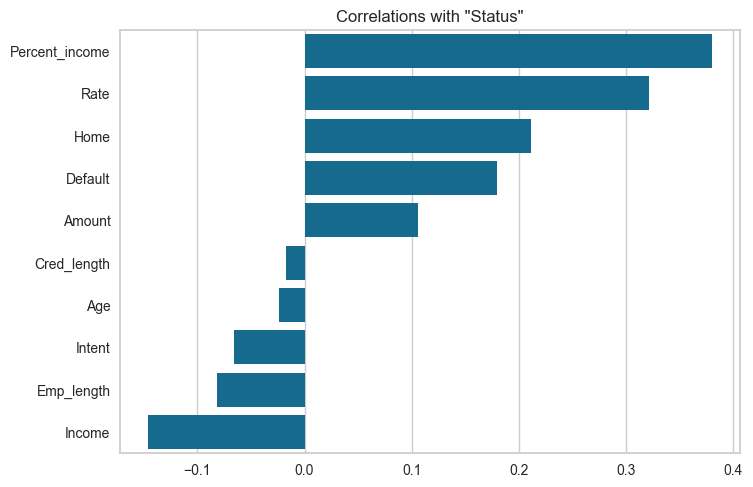

In [26]:
# Correlations with "Status"

limit = -1.0

data = df.corr()["Status"].sort_values(ascending=False)
indices = data.index
labels = []
corr = []
for i in range(1, len(indices)):
    if data[indices[i]]>limit:
        labels.append(indices[i])
        corr.append(data[i])
sns.barplot(x=corr, y=labels)
plt.title('Correlations with "Status"')
plt.show()

### 6 - Modeling

In [27]:
# assign X and y values
y = df["Status"]
X = df.drop("Status", axis="columns")

In [28]:
# split the data to train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [29]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((25800, 10), (6451, 10), (25800,), (6451,))

In [44]:
print(df.columns)


Index(['Age', 'Income', 'Home', 'Emp_length', 'Intent', 'Amount', 'Rate',
       'Status', 'Percent_income', 'Default', 'Cred_length'],
      dtype='object')


In [30]:
# Scale numerical features
scaler = StandardScaler()
numerical_columns = ['Age', 'Income', 'Emp_length', 'Amount', 'Rate', 'Percent_income', 'Cred_length']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

### 7 - Random Forest

In [31]:
# Importing Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier
classifier = RandomForestClassifier(criterion="gini",n_estimators=200,max_depth=20, min_samples_split=2, random_state=123)
# fit the model
classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, n_estimators=200, random_state=123)

In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=2, min_samples_leaf=1, bootstrap=True)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf, X, y, cv=5)

# Print cross-validation scores
print("Cross-validation scores: ", cv_scores)
print("Mean cross-validation score: ", cv_scores.mean())
print("Standard deviation of cross-validation scores: ", cv_scores.std())

Cross-validation scores:  [0.89458999 0.88046512 0.91457364 0.89627907 0.90666667]
Mean cross-validation score:  0.8985148964345411
Standard deviation of cross-validation scores:  0.011580441428976749


In [33]:
# Predict the Test set results
y_pred = classifier.predict(X_test)

In [34]:
# Check accuracy score
from sklearn.metrics import accuracy_score

print('Model accuracy score : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score : 0.9180


In [34]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: ')
print(cm)

Confusion Matrix: 
[[4971   67]
 [ 462  951]]


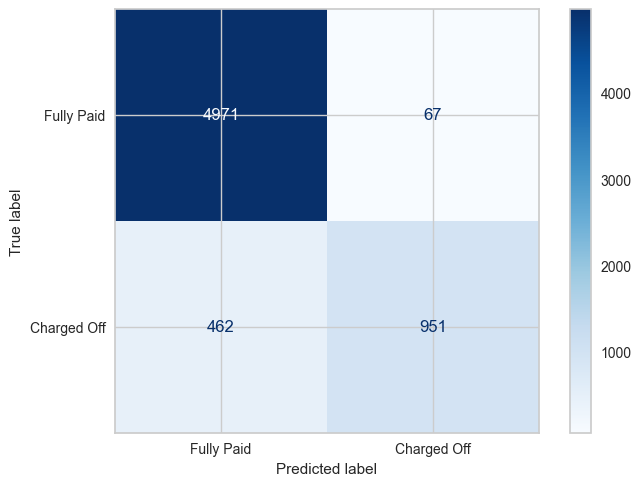

In [35]:
# Displaying Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    cmap=plt.cm.Blues,
    normalize=None,
    display_labels=['Fully Paid', 'Charged Off']
)


In [36]:
# classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      5038
           1       0.93      0.67      0.78      1413

    accuracy                           0.92      6451
   macro avg       0.92      0.83      0.87      6451
weighted avg       0.92      0.92      0.91      6451



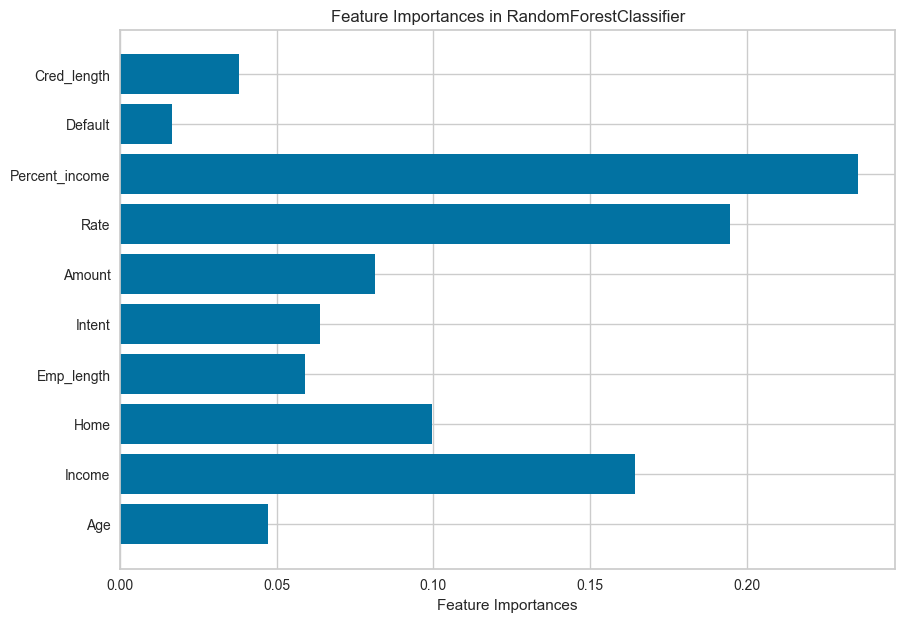

In [37]:
# Feature Importances in Random Forest

feature_names = classifier.feature_names_in_
feature_importances = classifier.feature_importances_

f, ax = plt.subplots(figsize=(10, 7))
ax.barh(range(len(feature_importances)), feature_importances)
ax.set_yticks(range(len(feature_importances)))
ax.set_yticklabels(feature_names)
ax.set_title("Feature Importances in RandomForestClassifier")
ax.set_xlabel("Feature Importances")
plt.show()

### 8 - Comparing model's performance with baseline models

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
l=LogisticRegression()
k=KNeighborsClassifier()
r=RandomForestClassifier()

In [39]:
# fitting the model
l.fit(X_train,y_train)
k.fit(X_train,y_train)
r.fit(X_train,y_train)

RandomForestClassifier()

In [40]:
# Assessing Models' Prediction
pred_LR=l.predict(X_test)
pred_KNN=k.predict(X_test)
pred_RF=r.predict(X_test)

In [41]:
# Print 'accuracy scores'

print('Accuracy Scores:')
print("LogisticReg:      ", accuracy_score(y_test, pred_LR))
print("KNeighbours:      ", accuracy_score(y_test, pred_KNN))
print("RandomForest:     ", accuracy_score(y_test, pred_RF))

Accuracy Scores:
LogisticReg:       0.824368314989924
KNeighbours:       0.8282436831498993
RandomForest:      0.9200124011781119


### RandomForest algorithm outperformed the other baseline models.

In [46]:
import joblib

joblib.dump(classifier, 'random_forest_model.pkl', compress=('zlib', 8))


['random_forest_model.pkl']